# Decision Tree Classifier

## Importing Reqiured Libraries

In [13]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## Importing the Data

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/akpmohan07/Difficulty-Predictor/master/static/Data/Train_Data.csv")
data.head()

,Question_Difficulty,Question_Type,Attended,Time_Taken,Submission,Hints_Used,Right,Partial,Wrong
0,Easy,Program,12740685,12.0,3,2,7999965,2864185,1876535
1,Medium,Match,13333275,7.3,8,5,5728370,2666655,4938250
2,Easy,FillUp,12049330,3.9,4,2,8493790,2567890,987650
3,Hard,MCQ,8395025,5.0,11,7,493825,987650,6913550
4,Easy,FillUp,11654270,3.0,3,2,6913550,3753070,987650


## Handling Categorical Data

### Handling Question_Type Category by Creating Dummy Variable

In [3]:
#Handling Question_Type Category by Creating Dummy Variable
data = data.drop('Attended',axis=1)
dummy = pd.get_dummies(data.Question_Type)
data = pd.concat([data,dummy],axis='columns')
data = data.drop('Question_Type',axis = 'columns')


### Handling Question_Difficulty Category by Label Encoding

In [4]:
#Handling Question_Difficulty Category by Label Encoding
le = LabelEncoder()
data.Question_Difficulty = le.fit_transform(data.Question_Difficulty)
data.head()

,Question_Difficulty,Time_Taken,Submission,Hints_Used,Right,Partial,Wrong,FillUp,MCQ,Match,Program
0,0,12.0,3,2,7999965,2864185,1876535,0,0,0,1
1,2,7.3,8,5,5728370,2666655,4938250,0,0,1,0
2,0,3.9,4,2,8493790,2567890,987650,1,0,0,0
3,1,5.0,11,7,493825,987650,6913550,0,1,0,0
4,0,3.0,3,2,6913550,3753070,987650,1,0,0,0


## Splitting the Feature and Target Data

In [5]:
#Splitting the Feature and Target Data
x = data.drop('Question_Difficulty',axis = 1)
y = data['Question_Difficulty']

## Spliting Train and Test Data

In [6]:
#Spliting Train and Test Data
train,test,train_label,test_label = train_test_split(x,y,random_state = 0,test_size=0.5)
print(train.shape,test.shape)

(247, 10) (247, 10)


## Creating DecisionTreeClassifier Model:

In [7]:
dtc = DecisionTreeClassifier()
dtc.fit(train,train_label)
print(dtc.score(test,test_label))

1.0


## Visualising the Tree

['Time_Taken' 'Submission' 'Hints_Used' 'Right' 'Partial' 'Wrong' 'FillUp'
 'MCQ' 'Match' 'Program']


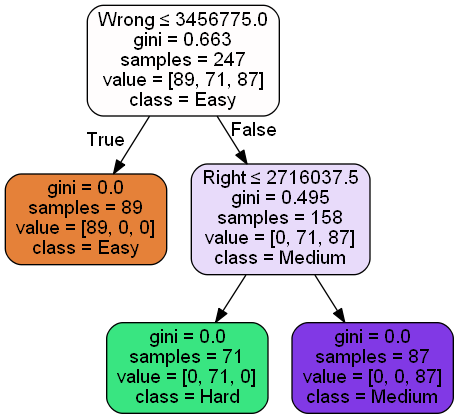

In [10]:
feature_cols = x.columns.values
print(feature_cols)
dot_data = StringIO()
export_graphviz(dtc, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['Easy','Hard','Medium'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## Boundary Analysis

In [11]:
def plot_decision_boundaries(X, y, model_class, **model_params):
    """
    Function to plot the decision boundaries of a classification model.
    This uses just the first two columns of the data for fitting 
    the model as we need to find the predicted value for every point in 
    scatter plot.
    Arguments:
            X: Feature data as a NumPy-type array.
            y: Label data as a NumPy-type array.
            model_class: A Scikit-learn ML estimator class 
            e.g. GaussianNB (imported from sklearn.naive_bayes) or
            LogisticRegression (imported from sklearn.linear_model)
            **model_params: Model parameters to be passed on to the ML estimator
    
    Typical code example:
            plt.figure()
            plt.title("KNN decision boundary with neighbros: 5",fontsize=16)
            plot_decision_boundaries(X_train,y_train,KNeighborsClassifier,n_neighbors=5)
            plt.show()
    """
    try:
        X = np.array(X)
        y = np.array(y).flatten()
    except:
        print("Coercing input data to NumPy arrays failed")
    # Reduces to the first two columns of data
    reduced_data = X[:, :2]
    #print(reduced_data)
    # Instantiate the model object
    model = model_class(**model_params)
    # Fits the model with the reduced data
    model.fit(reduced_data, y)

    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = .02     # point in the mesh [x_min, m_max]x[y_min, y_max].    

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    #print(y_min, y_max,x_min, x_max)
    # Meshgrid creation
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    #print(xx,yy)
    # Obtain labels for each point in mesh using the model.
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])    
   
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Predictions to obtain the classification results
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    # Plotting
    plt.contourf(xx, yy,Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
    plt.xlabel("Time-Taken",fontsize=15)
    plt.ylabel("Submission",fontsize=15)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    return plt

<module 'matplotlib.pyplot' from 'C:\\Users\\akpmohan\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

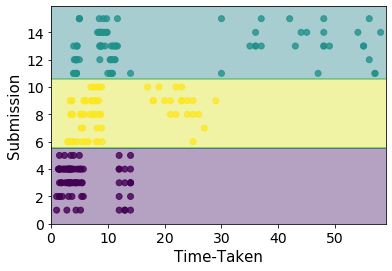

In [14]:
plot_decision_boundaries(test,test_label,DecisionTreeClassifier)